# Clustering con HDBSCAN

Autoajuste (HDBSCAN): utiliza toda una variedad de distancias para separar clústeres de densidades variables del ruido más disperso. El algoritmo HDBSCAN es el método de clustering que más se basa en los datos y, por tanto, requiere la menor participación del usuario.

In [ ]:
import pandas as pd
import numpy as np
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Ejemplo 1

In [3]:
from sklearn.datasets import make_blobs
import pandas as pd

In [4]:
import hdbscan
blobs, labels = make_blobs(n_samples=1000, n_features=10)

In [5]:
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,6.833377,-10.828533,6.541046,-5.037036,6.266705,-10.268410,8.541518,4.739742,-7.966313,3.977266
1,-9.814246,0.819048,1.347961,8.025475,3.668451,-1.600105,-5.918948,7.104278,-10.483993,-1.755161
2,-1.643902,10.503739,0.487462,10.377311,1.886033,-4.165141,-8.572726,8.158312,8.385469,-10.895620
3,-10.380276,0.761834,0.224063,9.483508,3.284204,-2.534546,-7.858587,5.479369,-10.087133,-2.514488
4,4.750661,-8.611609,5.365593,-5.889684,6.759163,-6.837312,9.957876,6.181029,-7.426413,2.658492


In [6]:
import hdbscan

In [15]:
clusterer = hdbscan.HDBSCAN()

In [16]:
clusterer.fit(blobs)

HDBSCAN()

In [17]:
clusterer.labels_


array([0, 1, 2, ..., 1, 1, 2], dtype=int64)

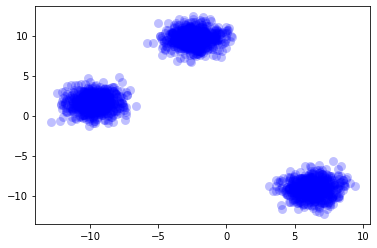

In [20]:
plot_kwds = {'alpha': 0.25, 's' :80, 'linewidths':0}
plt.scatter (blobs [:,0], blobs[:, 1], c='b', **plot_kwds)

In [26]:
clusterer = hdbscan.HDBSCAN(gen_min_span_tree=True)
clusterer.fit(blobs)

HDBSCAN(gen_min_span_tree=True)

In [28]:
clusterer.labels_

array([0, 1, 2, ..., 1, 1, 2], dtype=int64)

In [29]:
pd.crosstab (clusterer.labels_, columns='True')

col_0,True
row_0,
0,667
1,666
2,667


In [30]:
clusterer.probabilities_

array([0.55977351, 0.65644532, 0.77763846, ..., 0.54695117, 0.80798713,
       0.61454251])

<AxesSubplot:ylabel='$\\lambda$ value'>

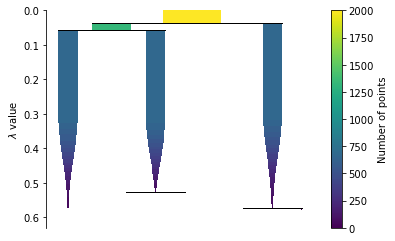

In [32]:
clusterer.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

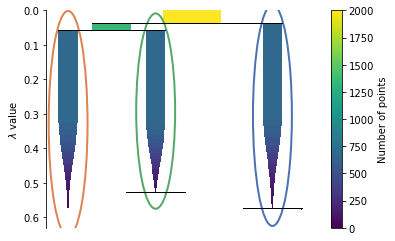

In [35]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',8))

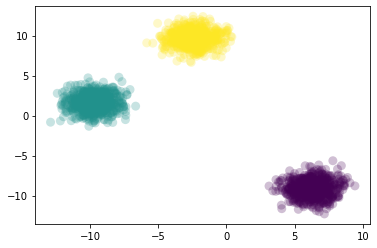

In [38]:
plot_kwds = {'alpha' :0.25, 's': 80, 'linewidths':0}

plt.scatter (blobs [:,0], blobs [:,1], c=clusterer.labels_ ,**plot_kwds)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

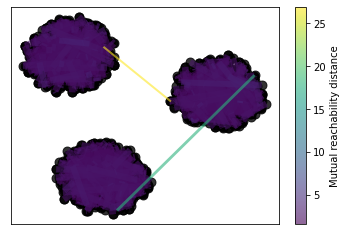

In [45]:
clusterer.minimum_spanning_tree_.plot (edge_cmap='viridis', edge_alpha=0.6, node_size=80,edge_linewidth=2)